## USA class

#### 2020

In [1]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score


In [2]:
ush20 = pd.read_csv('/Users/mac/Desktop/TFG/data/tables/US/household/2020/ahs2020n.csv' ,sep=",")
ush20.head(2)

,CONTROL,TOTROOMS,PERPOVLVL,JACPRIMARY,JACSECNDRY,JADEQUACY,JBATHEXCLU,JBATHROOMS,JBEDROOMS,JBLD,...,JJOBDIY23,JJOBFUNDS23,JJOBTYPE23,JJOBWORKYR23,JOBCOMP23,JOBCOMPYR23,JOBDIY23,JOBFUNDS23,JOBTYPE23,JOBWORKYR23
0,'11000005',8,465,'0','0','2','0','0','0','0',...,' ',' ',' ',' ',' ',' ',' ',' ',' ',' '
1,'11000007',8,501,'0','0','2','0','0','0','0',...,' ',' ',' ',' ',' ',' ',' ',' ',' ',' '


In [3]:
for col in ush20.columns:
    print(col)

CONTROL
TOTROOMS
PERPOVLVL
JACPRIMARY
JACSECNDRY
JADEQUACY
JBATHEXCLU
JBATHROOMS
JBEDROOMS
JBLD
JCELLPHONE
JCOLD
JCOLDCOST
JCOLDEQ
JCOLDEQFREQ
JCOLDHTCAP
JCOLDINSUL
JCOLDOTHER
JCOLDUTIL
JCONDO
JCOOKFUEL
JCOOKTYPE
JDBEVICLK
JDBEVICNOTE
JDBEVICTHT
JDBEVICWHERE
JDBFORCWHR
JDBLVEFORC
JDBMISSMORT
JDBMISSRENT
JDBUTBILL
JDINING
JDISHH
JDISHWASH
JDRYER
JDWNPAYPCT
JELECAMT
JENTRYSYS
JFINCP
JFINROOMS
JFIREPLACE
JFIRSTHOME
JFLOORHOLE
JFNDCRUMB
JFOUNDTYPE
JFRIDGE
JFS
JFUSEBLOW
JGARAGE
JGASAMT
JGRANDHH
JGUTREHB
JHEATFUEL
JHEATTYPE
JHHADLTKIDS
JHHAGE
JHHCARE
JHHCITSHP
JHHDTHSP
JHHENROLL
JHHERRND
JHHGRAD
JHHHEAR
JHHINUSYR
JHHMAR
JHHMEMRY
JHHMOVE
JHHNATVTY
JHHOLDKIDS
JHHRACE
JHHRACEAS
JHHRACEPI
JHHSEE
JHHSEX
JHHSPAN
JHHWALK
JHHYNGKIDS
JHINCP
JHMRACCESS
JHMRENEFF
JHMRSALE
JHOA
JHOAAMT
JHOTWATER
JHOWBUY
JHRATE
JHSHLDTYPE
JHUDSUB
JINSURAMT
JKITCHENS
JKITCHSINK
JKITEXCLU
JLANDLINE
JLAUNDY
JLEADINSP
JLEAKI
JLEAKIDK
JLEAKIOTH
JLEAKIPIPE
JLEAKIPLUM
JLEAKIWATH
JLEAKO
JLEAKOBASE
JLEAKOOTH
JLEAKOROOF
JLEAKOWALL

In [4]:
var20=ush20[['TOTROOMS','JBLD','JGARAGE','JPORCH','JBATHEXCLU','JBATHROOMS','JBEDROOMS','JDINING','JKITCHENS','JKITEXCLU','JTOTROOMS','JUNITFLOORS','JUNITSIZE','JADEQUACY','JUPKEEP','JHSHLDTYPE','JHHGRAD','JHHRACE','JFINCP','JHINCP','JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']]
var20

,TOTROOMS,JBLD,JGARAGE,JPORCH,JBATHEXCLU,JBATHROOMS,JBEDROOMS,JDINING,JKITCHENS,JKITEXCLU,...,JHHGRAD,JHHRACE,JFINCP,JHINCP,JPERPOVLVL,JNEARABAND,JNEARBARCL,JNEARTRASH,JRATINGHS,JRATINGNH
0,8,'0','0','0','0','0','0','0','0','0',...,'0','0','0','1','0','0','0','0','0','0'
1,8,'0','0','0','0','0','0','0','0','0',...,'0','0','0','1','0','0','0','0','0','0'
2,5,'0','0','0','0','0','0','0','0','0',...,'0','0','0','0','0','0','0','0','0','0'
3,5,'0','0','0','0','0','0','0','0','0',...,'0','0','0','1','0','0','0','0','0','0'
4,7,'0','0','0','0','0','0','0','0','0',...,'0','0','3','3','0','0','0','0','0','0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64136,4,'0','0','2','0','0','0','0','0','0',...,'0','0','0','0','0','0','0','0','0','0'
64137,5,'0','0','0','0','0','0','0','0','0',...,'0','0','0','1','0','0','0','0','0','0'
64138,6,'0','0','0','0','0','0','0','0','0',...,'0','0','0','0','0','0','0','0','0','0'
64139,3,'0','0','0','0','0','0','0','0','0',...,'0','0','0','1','0','0','0','0','0','0'


In [5]:
var20 = var20.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))
print(var20)

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_96073/2873404348.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  var20 = var20.apply(lambda x: pd.to_numeric(x.astype(str).str.replace('[^0-9]', ''), errors='coerce'))


       TOTROOMS  JBLD  JGARAGE  JPORCH  JBATHEXCLU  JBATHROOMS  JBEDROOMS  \
0             8     0        0       0           0           0          0   
1             8     0        0       0           0           0          0   
2             5     0        0       0           0           0          0   
3             5     0        0       0           0           0          0   
4             7     0        0       0           0           0          0   
...         ...   ...      ...     ...         ...         ...        ...   
64136         4     0        0       2           0           0          0   
64137         5     0        0       0           0           0          0   
64138         6     0        0       0           0           0          0   
64139         3     0        0       0           0           0          0   
64140         9     0        0       0           0           0          0   

       JDINING  JKITCHENS  JKITEXCLU  ...  JHHGRAD  JHHRACE  JFINCP  JHINCP

In [6]:
var20[['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH']].value_counts()

JPERPOVLVL  JNEARABAND  JNEARBARCL  JNEARTRASH  JRATINGHS  JRATINGNH
0           0           0           0           0          0            64141
dtype: int64

In [7]:
var20.drop(['JPERPOVLVL','JNEARABAND','JNEARBARCL','JNEARTRASH','JRATINGHS','JRATINGNH'], axis=1, inplace=True)

In [8]:
null_counts = var20.isnull().sum()
print(null_counts)

TOTROOMS       0
JBLD           0
JGARAGE        0
JPORCH         0
JBATHEXCLU     0
JBATHROOMS     0
JBEDROOMS      0
JDINING        0
JKITCHENS      0
JKITEXCLU      0
JTOTROOMS      0
JUNITFLOORS    0
JUNITSIZE      0
JADEQUACY      0
JUPKEEP        0
JHSHLDTYPE     0
JHHGRAD        0
JHHRACE        0
JFINCP         0
JHINCP         0
dtype: int64


### NO NULL VALUES

In [9]:
print(var20.describe())

           TOTROOMS          JBLD  JGARAGE        JPORCH    JBATHEXCLU  \
count  64141.000000  64141.000000  64141.0  64141.000000  64141.000000   
mean       5.440124      0.043669      0.0      0.014468      0.000967   
std        1.807665      0.291569      0.0      0.169492      0.043958   
min        1.000000      0.000000      0.0      0.000000      0.000000   
25%        4.000000      0.000000      0.0      0.000000      0.000000   
50%        5.000000      0.000000      0.0      0.000000      0.000000   
75%        7.000000      0.000000      0.0      0.000000      0.000000   
max       13.000000      3.000000      0.0      2.000000      2.000000   

         JBATHROOMS     JBEDROOMS       JDINING     JKITCHENS     JKITEXCLU  \
count  64141.000000  64141.000000  64141.000000  64141.000000  64141.000000   
mean       0.044527      0.027783      0.037168      0.024197      0.003866   
std        0.339868      0.234081      0.270103      0.218652      0.062061   
min        0.0000

             TOTROOMS      JBLD  JGARAGE    JPORCH  JBATHEXCLU  JBATHROOMS  \
TOTROOMS     1.000000 -0.145710      NaN -0.030147   -0.035177   -0.042253   
JBLD        -0.145710  1.000000      NaN  0.063563    0.001572    0.054639   
JGARAGE           NaN       NaN      NaN       NaN         NaN         NaN   
JPORCH      -0.030147  0.063563      NaN  1.000000    0.056715    0.469496   
JBATHEXCLU  -0.035177  0.001572      NaN  0.056715    1.000000    0.116085   
JBATHROOMS  -0.042253  0.054639      NaN  0.469496    0.116085    1.000000   
JBEDROOMS   -0.030077  0.056237      NaN  0.442567    0.082240    0.899247   
JDINING     -0.043340  0.046304      NaN  0.433705    0.133537    0.824699   
JKITCHENS   -0.034833  0.055814      NaN  0.463417    0.153288    0.865407   
JKITEXCLU   -0.055888  0.103540      NaN  0.237760   -0.001370    0.293416   
JTOTROOMS    0.374851 -0.042029      NaN  0.248885    0.064498    0.483807   
JUNITFLOORS -0.046370  0.102488      NaN  0.347159    0.019625  

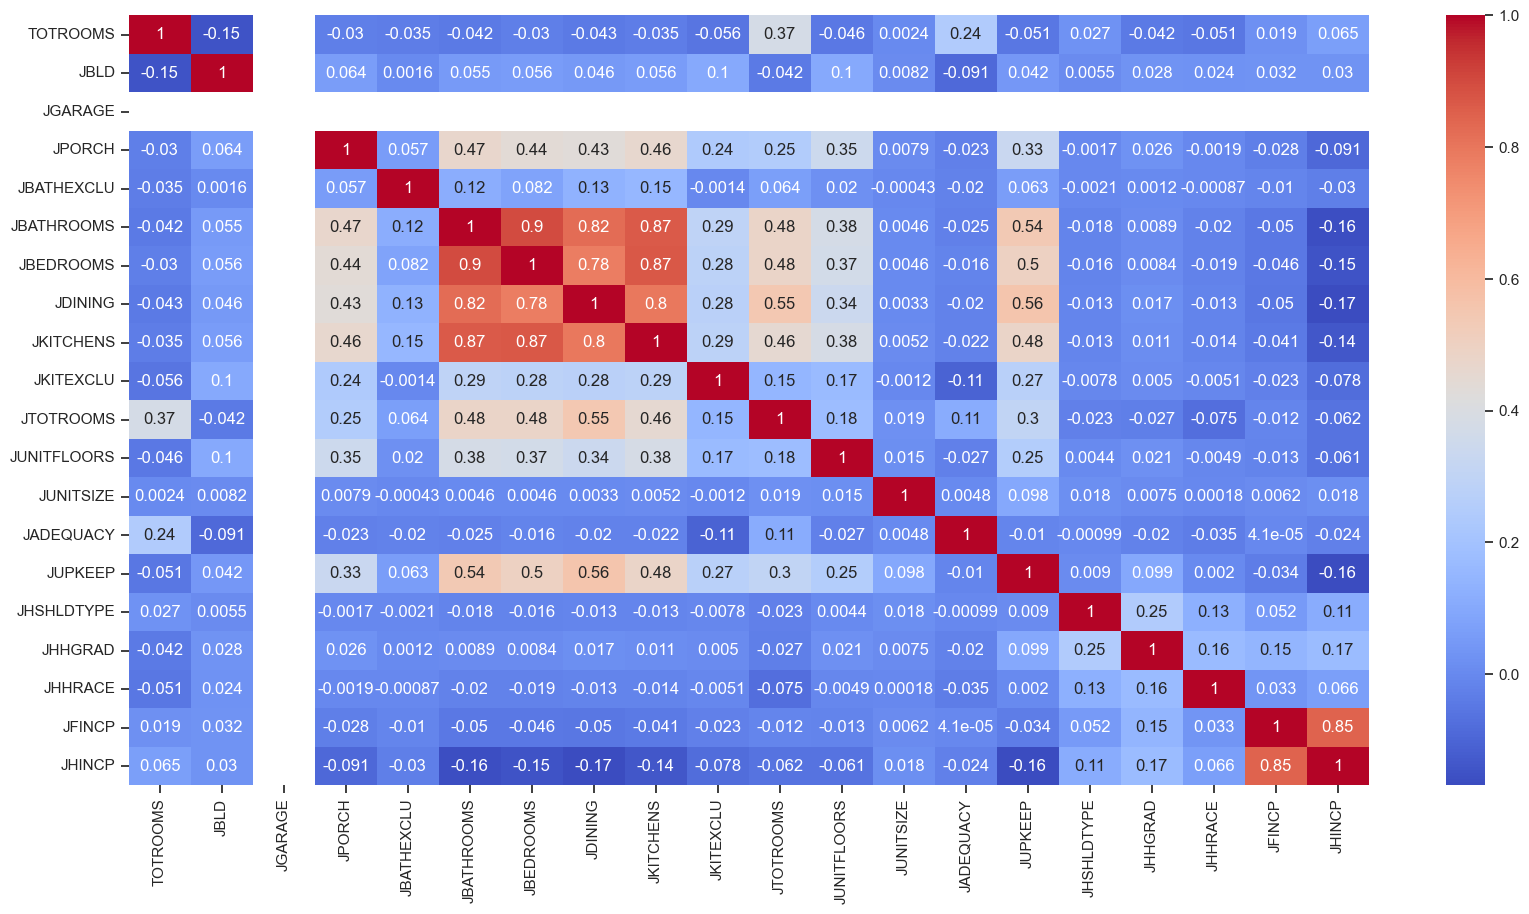

In [10]:
print(var20.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var20.corr(), annot=True, cmap='coolwarm')
plt.show()

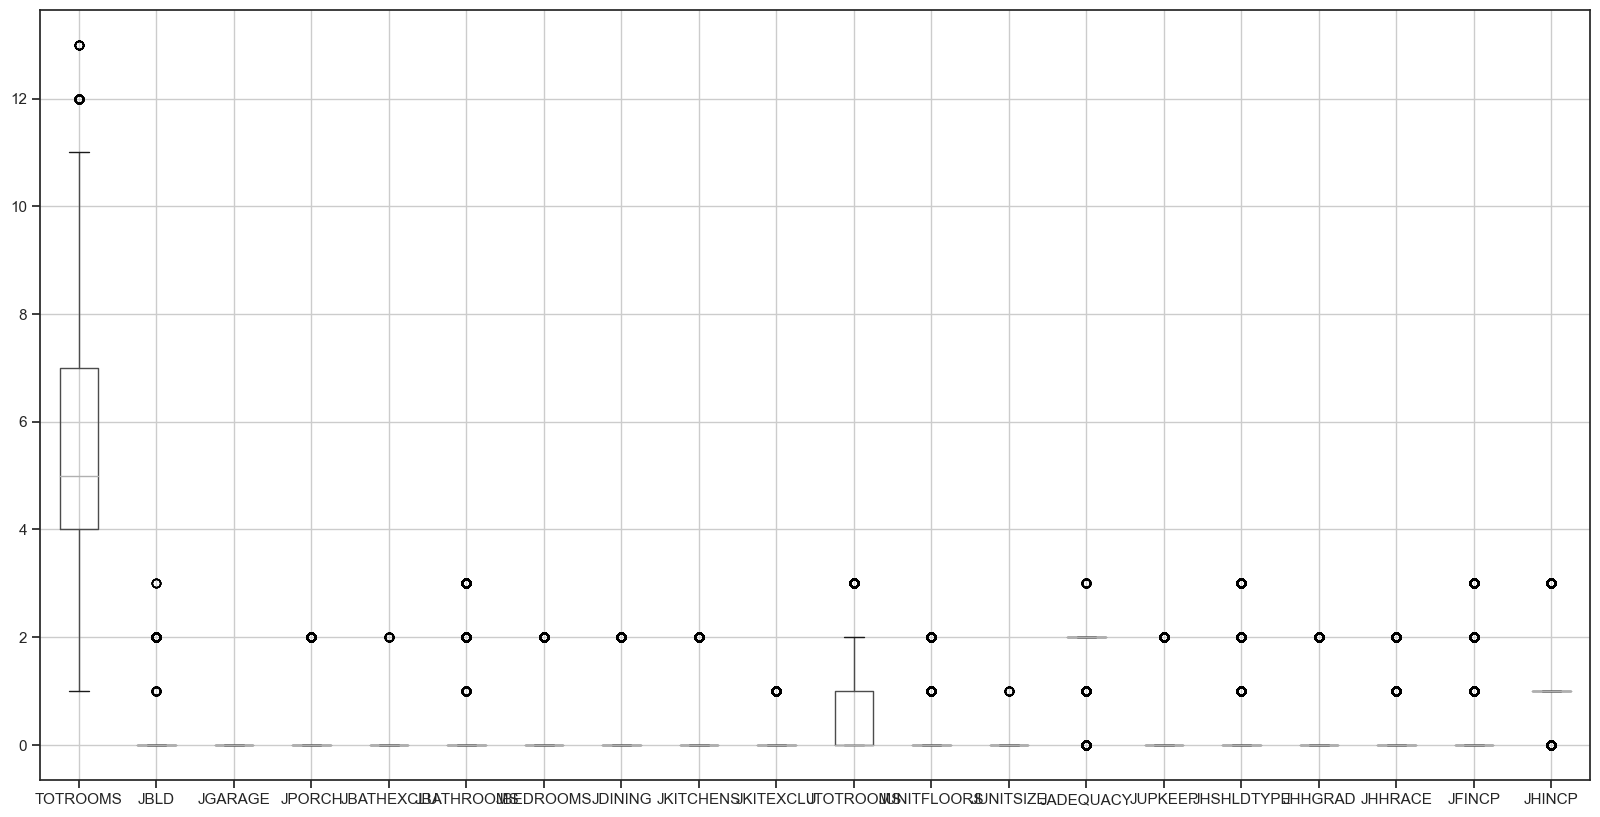

In [11]:
var20.boxplot(figsize=(20,10))
plt.show()

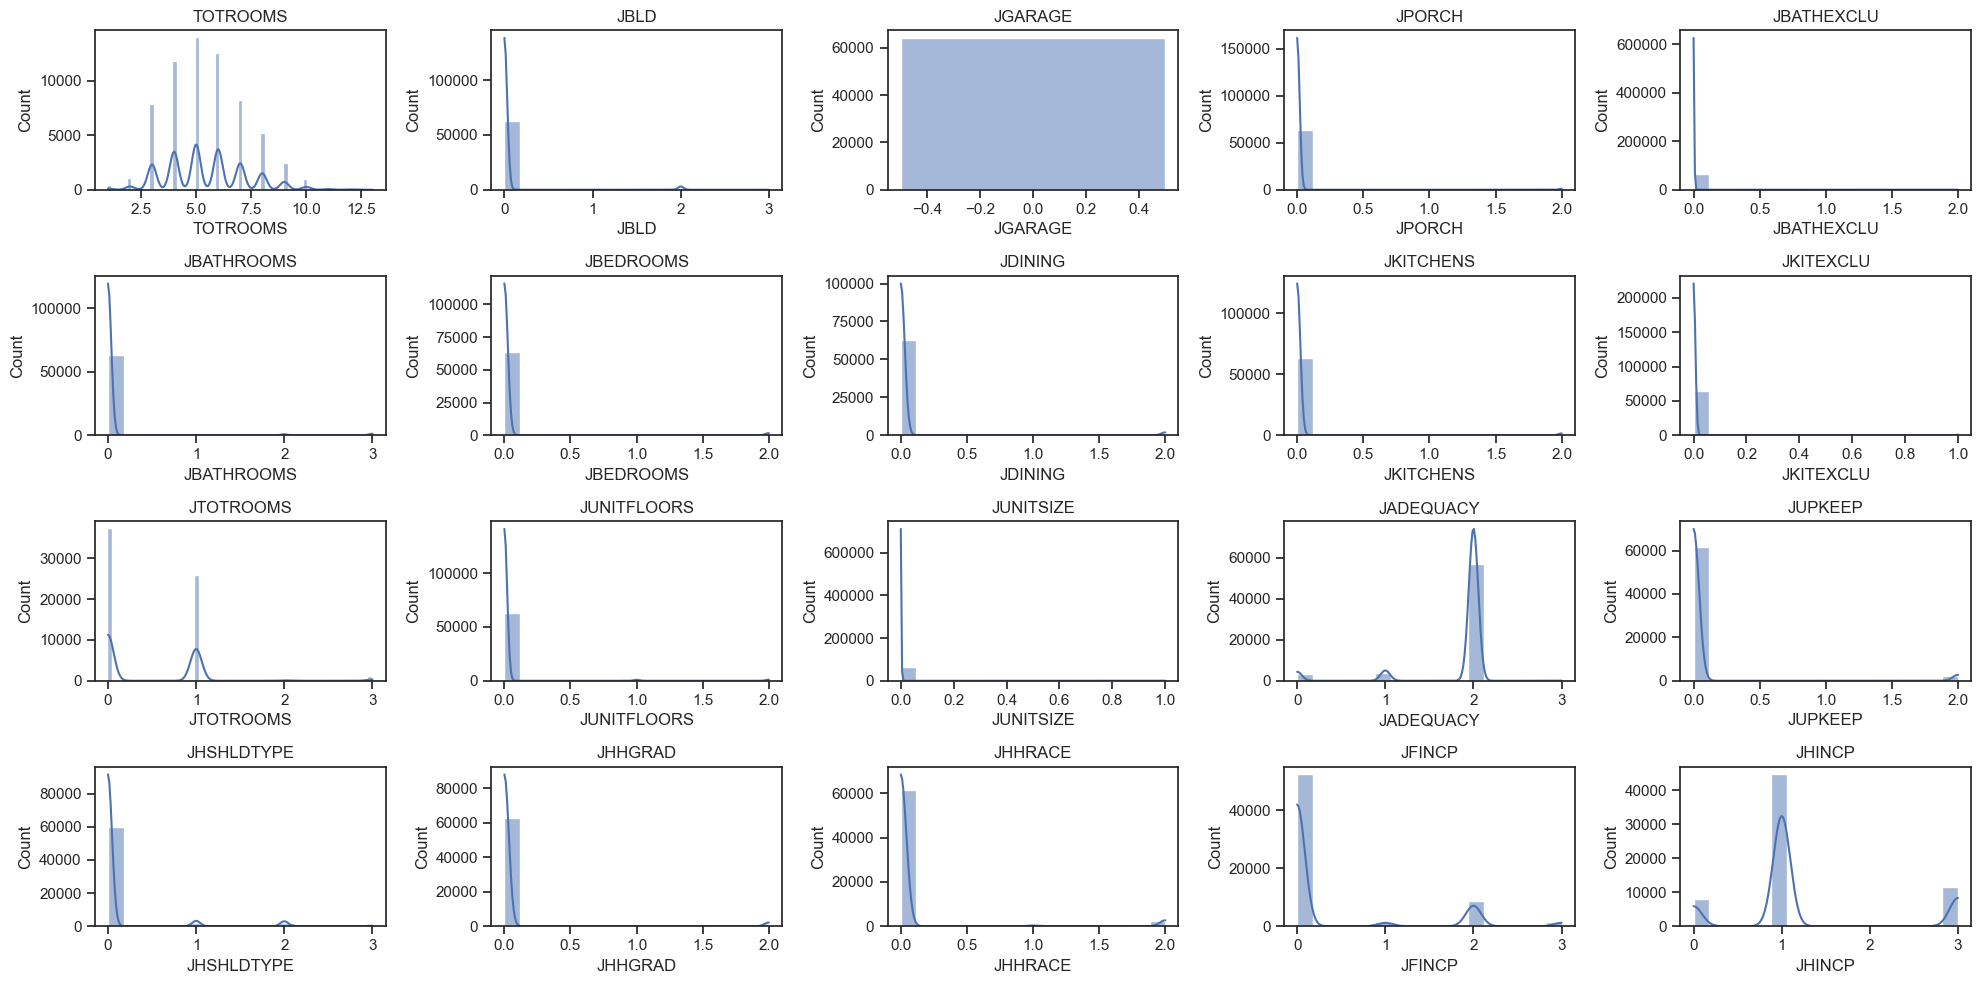

In [12]:
num_rows = 4
num_cols = 5
variable_names = list(var20.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var20[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_96073/1100159044.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=var20['JHINCP'], shade=True)


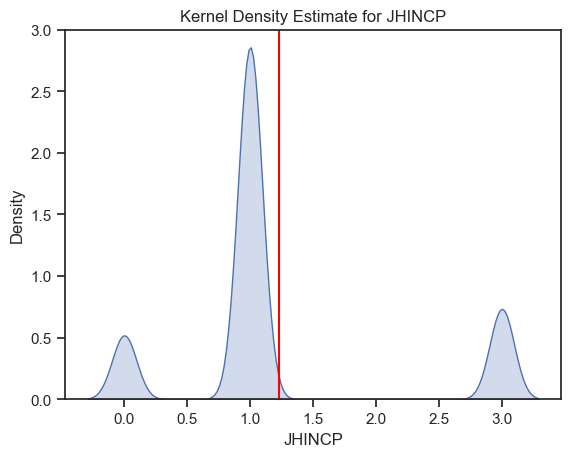

In [13]:
sns.kdeplot(data=var20['JHINCP'], shade=True)
mean_value = var20['JHINCP'].mean()
plt.axvline(x=mean_value, color='red')
plt.title(f"Kernel Density Estimate for {var_name}")
plt.show()

In [14]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(var20)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

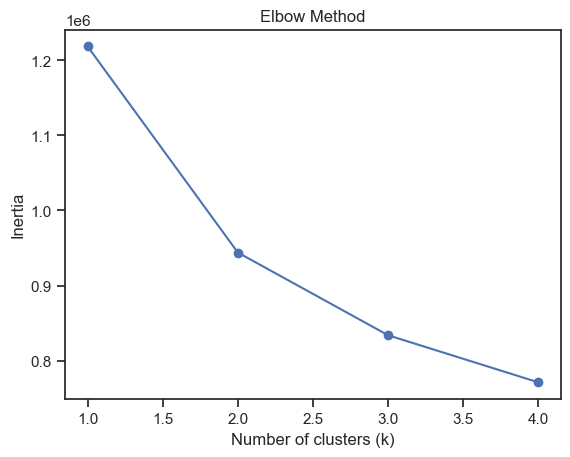

In [15]:
inertia = []
k_values = list(range(1, 5))  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [16]:
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)


/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


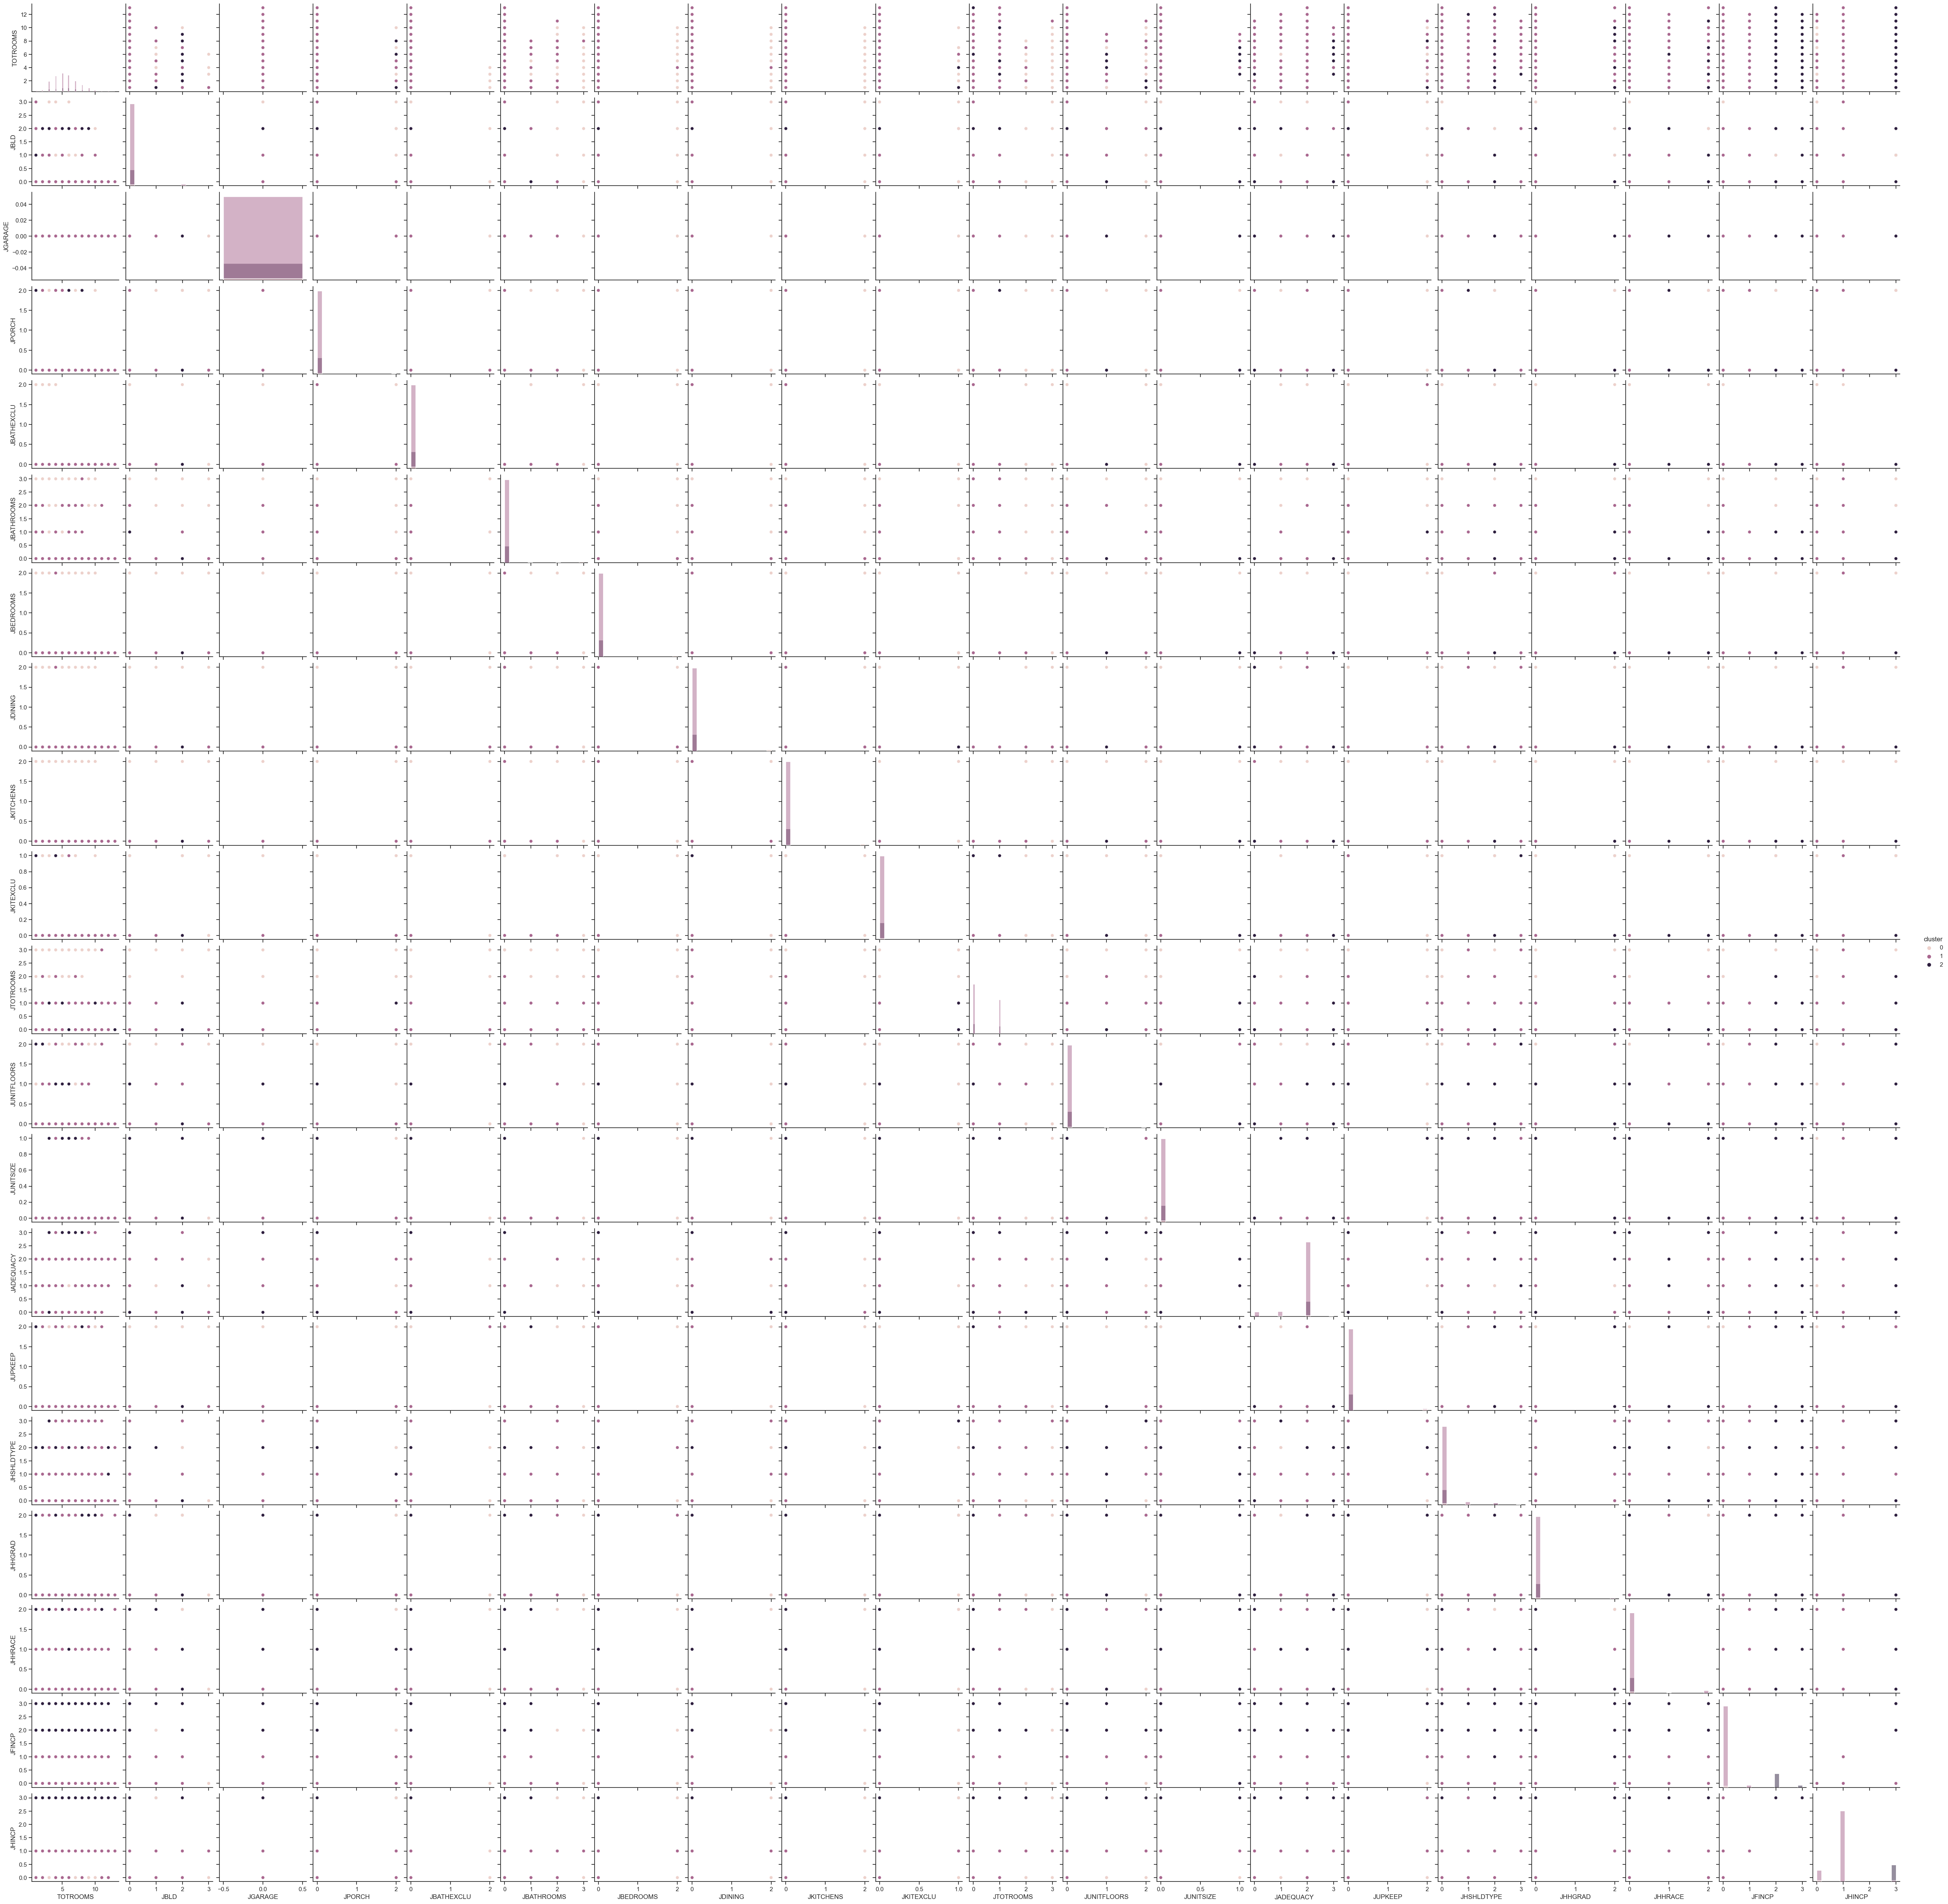

In [23]:
var20_clustered = var20.copy()
var20_clustered['cluster'] = kmeans_clusters
sns.pairplot(var20_clustered, hue='cluster', diag_kind='hist')
plt.show()

In [25]:
var20_clustered['cluster'].value_counts()

1    52696
2    10526
0      919
Name: cluster, dtype: int64

In [27]:
mean_income = var20_clustered.groupby('cluster')['JHINCP'].mean()
print(mean_income)

cluster
0    0.108814
1    0.897070
2    2.998100
Name: JHINCP, dtype: float64


In [28]:
var20_clustered['cluster'] = var20_clustered['cluster'].replace({0:1, 1:2, 2:3})
var20_clustered['cluster'].value_counts()

2    52696
3    10526
1      919
Name: cluster, dtype: int64

# Sexual harrassment
There are 298,628 female victims of sexual harassment in 2020 in the US